In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams["figure.dpi"] = 150
import ipywidgets as widgets
from particle import PDGID
import sys
sys.path.append("../../../Muon_Collider_Smart_Pixels/daniel/validationPlots")
from plotUtils import *
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

In [3]:
sensorAngles = np.arange(-np.pi,np.pi+2*np.pi/8,np.pi/8)

In [4]:
sig = pd.read_csv('/local/d1/smartpixML/2026Datasets/Data_Files/Data_Set_flp_0/Track_Lists/signal_tracks_extra_info_0.txt', sep=' ')
sig
print(np.unique(sig['gamma']))

[-2.74889 -2.35619 -1.9635  -1.5708  -1.1781  -0.7854  -0.3927   0.
  0.3927   0.7854   1.1781   1.5708   1.9635   2.35619  2.74889  3.14159]


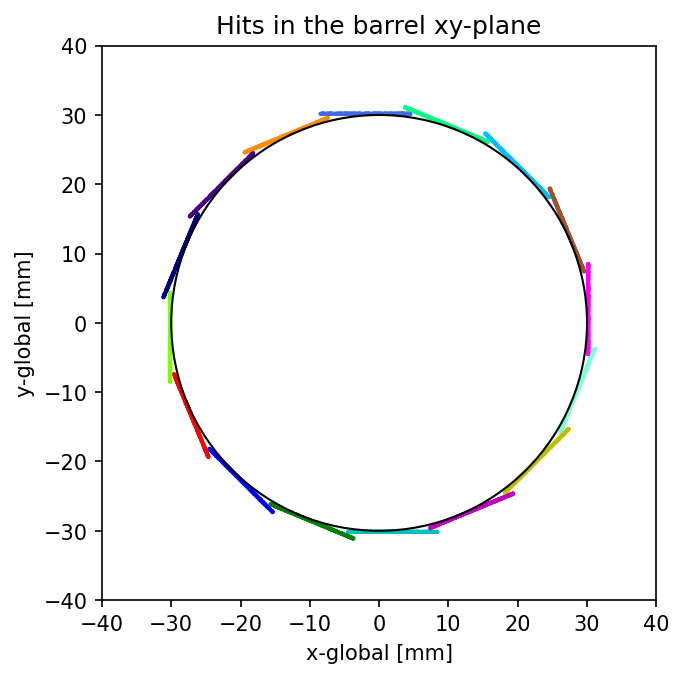

In [24]:
def plotHits(sig,pltStandalone=True,pltShow=True,alpha = 1):
    if pltStandalone:
        fig,ax=plt.subplots()
    else:
        ax = plt.gca()
    uniqueGammas = np.unique(sig['gamma'])
    colorsList = ["r","b","g","c","m","y","aquamarine","fuchsia",
                "sienna","deepskyblue","springgreen","royalblue",
                "darkorange","indigo","navy","chartreuse"]
    # colorsList = ["r","darkorange","y","greenyellow","springgreen","g","aquamarine","c","deepskyblue","royalblue","b","navy","indigo","m","fuchsia",
    #             "sienna"]
    colors = sig['gamma'].apply(lambda gamma: colorsList[list(uniqueGammas).index(gamma)])
    ax.scatter(sig['hit_x'],sig["hit_y"],s=1, c=colors, label="Signal hits",alpha = alpha)
    plt.gca().set_aspect('equal')
    circle=plt.Circle((0,0), 30, fill=0, color='k', label="Barrel")
    ax.add_patch(circle)
    ax.set_title("Hits in the barrel xy-plane")
    ax.set_xlabel("x-global [mm]")
    ax.set_ylabel("y-global [mm]")
    ax.set_xlim(-40,40)
    ax.set_ylim(-40,40)
    if pltShow:
        plt.show()
plotHits(sig)

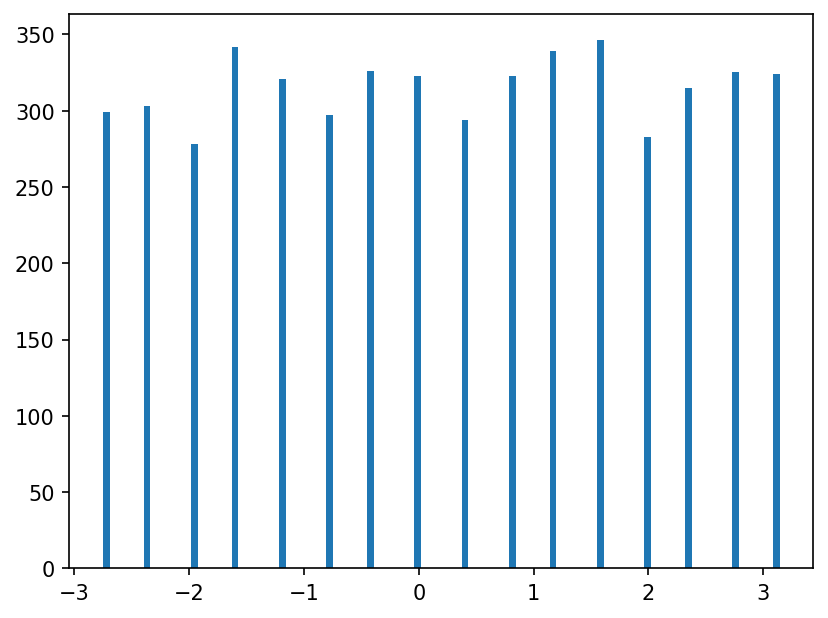

[-2.74889 -2.35619 -1.9635  -1.5708  -1.1781  -0.7854  -0.3927   0.
  0.3927   0.7854   1.1781   1.5708   1.9635   2.35619  2.74889  3.14159]
[ 3.57189107e-06  4.49019235e-06 -4.59150638e-06 -3.67320510e-06
 -2.75490383e-06 -1.83660255e-06 -9.18301276e-07  0.00000000e+00
  9.18301276e-07  1.83660255e-06  2.75490383e-06  3.67320510e-06
  4.59150638e-06 -4.49019235e-06 -3.57189107e-06 -2.65358979e-06]
[-3.14159265 -2.74889357 -2.35619449 -1.96349541 -1.57079633 -1.17809725
 -0.78539816 -0.39269908  0.          0.39269908  0.78539816  1.17809725
  1.57079633  1.96349541  2.35619449  2.74889357  3.14159265  3.53429174]


In [6]:
plt.hist(sig['gamma'],bins=100);plt.show()
print(np.unique(sig['gamma']))
print(np.unique(sig['gamma'])-sensorAngles[1:-1])

print(sensorAngles)

In [7]:
Vec0 = []
Vec1 = []
Vec11 = []
Q=[]
p_from_angles = []

for x, y, phi, theta, cota, cotb, pt, pid, gamma in zip(sig['hit_x'],sig['hit_y'],sig['phi'],sig['theta'],sig['cota'],sig['cotb'],sig['pt'],sig['hit_pdg'],sig['gamma']):

    x0=np.cos(phi)
    y0=np.sin(phi)

    Vec0.append((x0,y0))

    beta = phi-(gamma-np.pi/2)

    if beta < -np.pi:
        beta += 2*np.pi
        # print("gee")
    if beta > np.pi:
        beta -= 2*np.pi
        print("GAA")


    xp=np.cos(beta)
    yp=np.sin(beta)
    
    Vec1.append((xp,yp))

    Q.append(PDGID(pid).charge)

    nz=1/np.sqrt(1+cota**2+cotb**2)
    ny=cotb*nz
    nx=cota*nz
    # for alternate vector, scale to magnitude=1
    Vec11.append((ny/np.sqrt(nz**2+ny**2), nz/np.sqrt(nz**2+ny**2)))

    p_from_angles.append(pt / np.sqrt((nz**2 + ny**2)))

sig['vec0'] = Vec0
sig['vec1'] = Vec1
sig['vec11'] = Vec11
sig['Q']=Q
sig['p_from_angles']=p_from_angles

GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA
GAA


In [8]:

#Requires vector is a 2 element list with the x, then y component
#and that angle is in radians
def rotateVector(vector,theta):
    matrix= np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    print(matrix)
    return matrix @ vector 

def plot(angleIndex,i,use_weird_tracks=False):
    cut1 = np.abs(sig['gamma'] - sensorAngles[angleIndex])<0.01
    if use_weird_tracks:
        cut2=abs(sig['p']-sig['p_from_angles'])>10
        cut = cut1 & cut2
    else:
        cut = cut1
    # Pull single point and vector
    vec0 = sig['vec0'][cut].reset_index(drop=True)[i]
    vec1 = sig['vec1'][cut].reset_index(drop=True)[i]
    vec11 = sig['vec11'][cut].reset_index(drop=True)[i]
    x0 = sig['hit_x'][cut].reset_index(drop=True)[i]
    y0 = sig['hit_y'][cut].reset_index(drop=True)[i]
    y1 = sig['ylocal'][cut].reset_index(drop=True)[i]

    fig,ax=plt.subplots(ncols=2)
    ax[0].scatter(sig['hit_x'][cut1],sig['hit_y'][cut1],s=1, c='r')
    ax[0].scatter(x0,y0,c='b')
    ax[0].quiver(x0,y0,vec0[0],vec0[1],scale=10)
    ax[0].quiver(0,0,np.cos(sensorAngles[angleIndex]),np.sin(sensorAngles[angleIndex]),scale=10)
    plt.gca().set_aspect('equal')
    circle=plt.Circle((0,0), 30, fill=0, color='k')
    ax[0].add_patch(circle)
    ax[0].set_title("BIB hit location in xy-plane")
    ax[0].set_xlabel("x [mm]")
    ax[0].set_ylabel("y [mm]")
    ax[0].set_xlim(-40,40)
    ax[0].set_ylim(-40,40)
    ax[0].set_aspect('equal')

    ax[1].scatter(y1,0,c='b')
    ax[1].quiver(y1,0,vec1[0],vec1[1],scale=10,color="k")
    ax[1].quiver(y1,0,vec11[0],vec11[1],scale=10,color="b")
    ax[1].hlines(y=0,color='r',xmin=-4.5,xmax=8.5)
    ax[1].set_xlim(-5.5, 9.5) 
    ax[1].set_ylim(-1, 2) 
    ax[1].invert_xaxis()

    ax[1].set_title(f'Total Range: {y1}; ylocal={sig["ylocal"][i]}; Gamma={gamma}')

    plt.show()



def plotRotated(angleIndex,i,use_weird_tracks=False):
    cut1 = np.abs(sig['gamma'] - sensorAngles[angleIndex])<0.01 #should be able to make this 0.00001
    if use_weird_tracks:
        cut2=abs(sig['p']-sig['p_from_angles'])>10
        cut = cut1 & cut2
    else:
        cut = cut1
    # Pull single point and vector
    vec0 = sig['vec0'][cut].reset_index(drop=True)[i]
    vec1 = sig['vec1'][cut].reset_index(drop=True)[i]
    vec11 = sig['vec11'][cut].reset_index(drop=True)[i]
    x0 = sig['hit_x'][cut].reset_index(drop=True)[i]
    y0 = sig['hit_y'][cut].reset_index(drop=True)[i]
    y1 = sig['ylocal'][cut].reset_index(drop=True)[i]

    # fig,ax=plt.subplots(ncols=2)
    fig = plt.figure()
    ax1 = plt.subplot(121)
    ax1.scatter(sig['hit_x'][cut1],sig['hit_y'][cut1],s=1, c='r')
    ax1.scatter(x0,y0,c='b')
    ax1.quiver(x0,y0,vec0[0],vec0[1],scale=10)
    ax1.quiver(0,0,np.cos(sensorAngles[angleIndex]),np.sin(sensorAngles[angleIndex]),scale=10)
    plt.gca().set_aspect('equal')
    circle=plt.Circle((0,0), 30, fill=0, color='k')
    ax1.add_patch(circle)
    ax1.set_title("BIB hit location in xy-plane")
    ax1.set_xlabel("x [mm]")
    ax1.set_ylabel("y [mm]")
    ax1.set_xlim(-40,40)
    ax1.set_ylim(-40,40)
    ax1.set_aspect('equal')

    plot_extents = -5.5, 9.5, -1, 2
    transform = Affine2D().rotate_deg(sensorAngles[angleIndex] * 180/np.pi - 90)
    helper = floating_axes.GridHelperCurveLinear(transform,plot_extents)
    ax2 = floating_axes.FloatingSubplot(fig, 122, grid_helper=helper)
    ax2 = fig.add_subplot(ax2)
    ax2 = ax2.get_aux_axes(transform)

    # print(vec1)
    # print(vec11)
    vec1 = rotateVector(vec1, sensorAngles[angleIndex]-np.pi/2)
    vec11 = rotateVector(vec11, sensorAngles[angleIndex]-np.pi/2)
    # print(vec1)
    # print(vec11)
    # print(sensorAngles[angleIndex]-np.pi/2)
    ax2.scatter(y1,0,c='b')
    ax2.quiver(y1,0,vec1[0],vec1[1],scale=10,color="k")
    ax2.quiver(y1,0,vec11[0],vec11[1],scale=10,color="b")
    # ax2.hlines(y=0,color='r',xmin=-4.5,xmax=8.5)
    ax2.plot(np.linspace(-4.5,8.5,10),[0 for i in range(10)],color='r')
    ax2.set_xlim(-5.5, 9.5) 
    ax2.set_ylim(-1, 2) 
    ax2.invert_xaxis()

    ax2.set_title(f'Total Range: {y1}; ylocal={sig["ylocal"][i]}; Gamma={gamma}')

    plt.show()


In [9]:
widgets.interact(plotRotated, angleIndex=widgets.IntSlider(min=1, max=16, step=1), i=widgets.IntSlider(min=0, max=100, step=1),use_werid_hits=False)
widgets.interact(plot, angleIndex=widgets.IntSlider(min=1, max=16, step=1), i=widgets.IntSlider(min=0, max=100, step=1),use_werid_hits=False)



interactive(children=(IntSlider(value=1, description='angleIndex', max=16, min=1), IntSlider(value=0, descript…

interactive(children=(IntSlider(value=1, description='angleIndex', max=16, min=1), IntSlider(value=0, descript…

<function __main__.plot(angleIndex, i, use_weird_tracks=False)>

In [10]:
cut=abs(sig['p']-sig['p_from_angles'])>50
len(sig[cut])

11

In [11]:
print(sig['vec0'])
print(sig['vec1'])

0         (-0.1611874056934765, 0.9869238168398848)
1         (0.2279739470572793, -0.9736672324070091)
2        (0.10689171841656366, -0.9942706676423448)
3        (-0.6078130990893701, -0.7940801197457191)
4        (-0.7651882449087493, -0.6438066090476766)
                           ...                     
5033       (0.3814333000331893, 0.9243963639185255)
5034     (-0.6801107355338655, -0.7331093966193479)
5035       (-0.3413884261582538, 0.939922306621771)
5036      (0.7508554360693628, -0.6604665881973797)
5037    (-0.8809962003967785, -0.47312334003559725)
Name: vec0, Length: 5038, dtype: object
0          (-0.1611837805187884, 0.9869244089076281)
1         (-0.22797752353518855, 0.9736663950053748)
2          (-0.1068953705759332, 0.9942702750004316)
3         (-0.13170622234149693, 0.9912887929339926)
4          (0.08583425145072421, 0.9963094304872828)
                            ...                     
5033    (-0.0013499995899376605, 0.9999990887501384)
5034     (-0.0374

In [12]:
len(cut)

5038

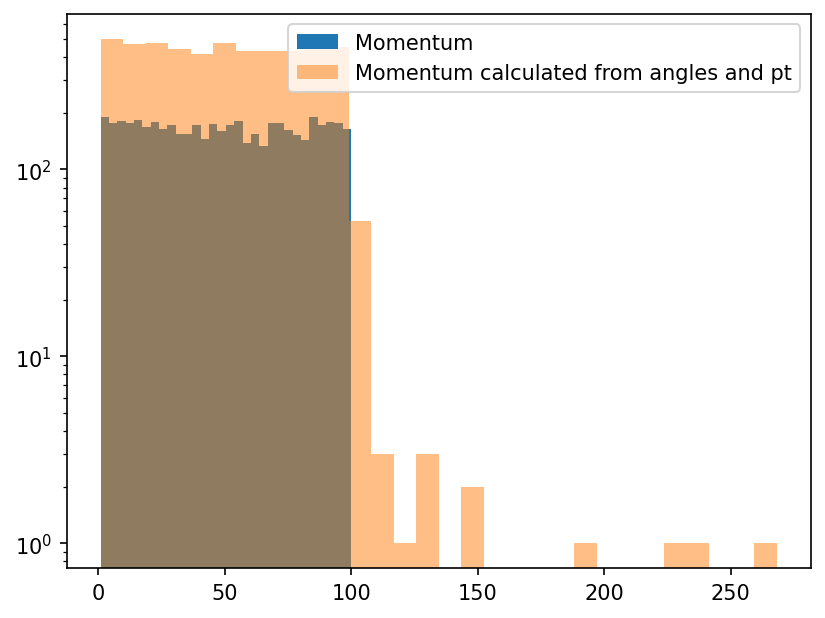

In [13]:
plt.hist(sig['p'],bins=30,label="Momentum")
plt.hist(sig['p_from_angles'],bins=30,label="Momentum calculated from angles and pt",alpha=0.5)
plt.yscale("log")
plt.legend()
plt.show()

Setting the histogram bins to be the collective range for the input arrs
p max is 99.9944 and min is 1.02321
p from cota and cotb max is 268.20094749673507 and min is 1.0223543825809853
So bins go from 1.0223543825809853 to 268.20094749673507, and there are 30 bins with linear spacing


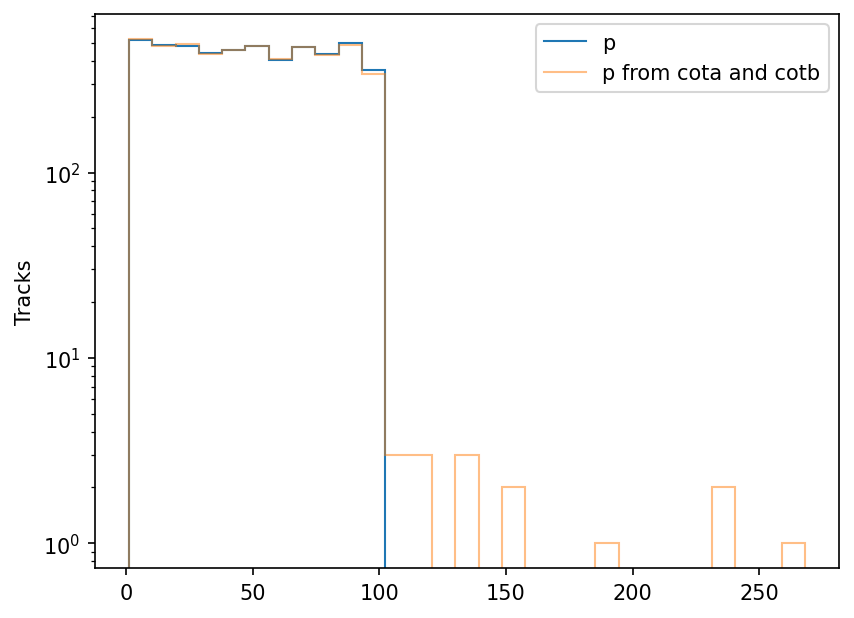

In [14]:
plotManyHisto([sig["p"],sig["p_from_angles"]],pltLabels=["p","p from cota and cotb"],pltStandalone=False,yscale="log",alphas=[1,0.5])


In [15]:
sig[abs(sig['p']-sig['p_from_angles'])>10]

,cota,cotb,p,flp,ylocal,zglobal,pt,t,hit_pdg,hit_x,...,prody,prodz,gamma,phi,theta,vec0,vec1,vec11,Q,p_from_angles
294,0.41041,-0.07988,33.33221,0,-0.625,-39.975,20.41146,0.19820,-13,-27.62627,...,0.00005,0.72099,2.74889,-0.31298,1.18246,"(0.9514202679462148, -0.30789523176098843)","(0.0796382315242257, -0.996823832018323)","(-0.07962636343537544, 0.9968247801123613)",1.0,22.053526
296,0.39799,-0.37343,33.33221,0,-0.600,-38.525,20.41146,0.21413,-13,-27.64223,...,0.00005,0.72099,2.74889,-0.03530,1.21392,"(0.9993770196948247, -0.03529266929391755)","(0.34984219949593026, -0.9368086439886482)","(-0.3498336448819236, 0.9368118385826623)",1.0,21.784020
532,-3.30090,-1.66431,79.97203,0,7.975,18.900,66.65602,0.12510,-13,-18.90755,...,0.00068,-1.86582,1.96350,2.99325,0.53171,"(-0.9890173905985964, 0.14779919178920878)","(-0.8571702576881082, 0.5150331536269313)","(-0.8571714699749087, 0.5150311360112652)",1.0,131.470029
534,3.62696,-2.49680,79.97203,0,-3.425,22.450,66.65602,0.14405,-13,-18.88620,...,0.00068,-1.86582,2.35619,0.40445,0.63808,"(0.9193189684588188, 0.39351319448248917)","(0.9283141944234765, -0.3717966600601622)","(-0.9283124950182081, 0.3718009031633323)",1.0,111.904145
535,0.12794,0.10921,79.97203,0,-3.750,23.950,66.65602,0.15855,-13,-18.66141,...,0.00068,-1.86582,2.35619,2.24741,1.69730,"(-0.6261563084712749, 0.7796975550568473)","(0.1085655930014784, 0.9940892877484584)","(0.10856450410218538, 0.9940894066677537)",1.0,67.192962
737,-0.03785,-0.14326,93.82390,0,-0.425,45.750,53.24897,0.17737,-13,11.92777,...,-0.00002,2.00142,1.17810,1.32039,1.53334,"(0.24779763389916123, 0.9688118148711736)","(-0.14181034140478455, 0.9898938463646789)","(-0.14181215520504845, 0.989893586521349)",1.0,53.286333
738,-0.01969,0.06827,93.82390,0,1.500,45.725,53.24897,0.18771,-13,10.15624,...,-0.00002,2.00142,1.17810,-2.03166,1.59044,"(-0.4447218378243789, -0.8956687372919224)","(-0.06811456548360709, -0.9976775059952887)","(0.06811145781881234, 0.9976777181604269)",1.0,53.259243
739,-0.22773,-0.59290,93.82390,0,-0.300,45.825,53.24897,0.19973,-13,11.82899,...,-0.00002,2.00142,1.17810,1.71328,1.37736,"(-0.14200205465791949, 0.9898663629363962)","(-0.5099958795217042, 0.8601768439518024)","(-0.5099980779624856, 0.8601755405000601)",1.0,54.260988
740,0.50815,0.93455,93.82390,0,1.050,46.300,53.24897,0.20594,-13,10.58401,...,-0.00002,2.00142,1.17810,-2.71507,1.21531,"(-0.9104098553685808, -0.41370749962716397)","(-0.6827920383896215, -0.7306127786397837)","(0.6827931774460466, 0.7306117141362651)",1.0,56.800311
741,-0.25300,0.63107,93.82390,0,0.525,45.575,53.24897,0.21360,-13,11.06165,...,-0.00002,2.00142,1.17810,0.61514,1.36002,"(0.816692664703587, 0.5770728649133958)","(0.5336917423685215, 0.8456790905110826)","(0.5336852780723464, 0.8456831699690152)",1.0,54.454146


In [16]:
sensorAngles

array([-3.14159265, -2.74889357, -2.35619449, -1.96349541, -1.57079633,
       -1.17809725, -0.78539816, -0.39269908,  0.        ,  0.39269908,
        0.78539816,  1.17809725,  1.57079633,  1.96349541,  2.35619449,
        2.74889357,  3.14159265,  3.53429174])

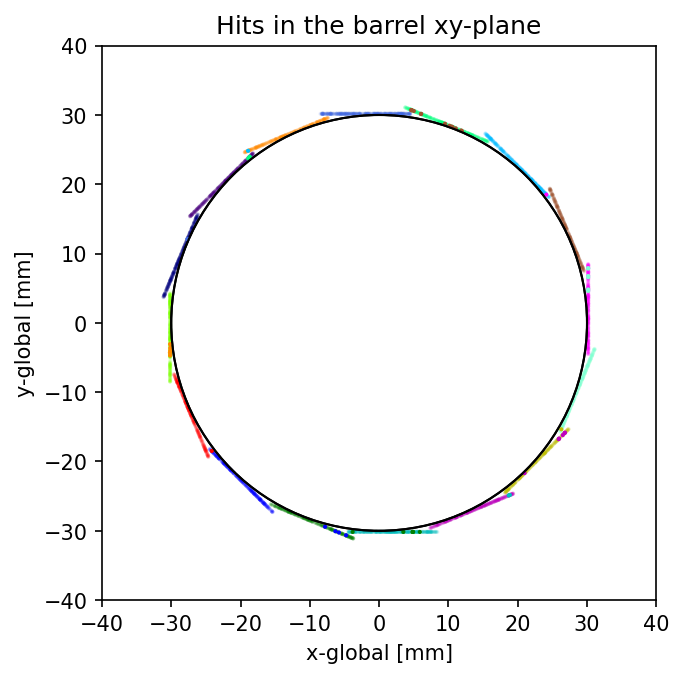

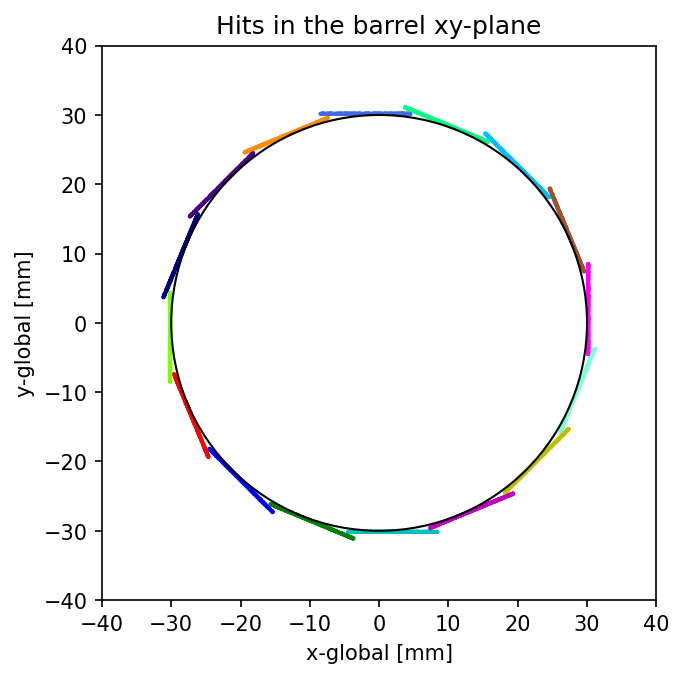

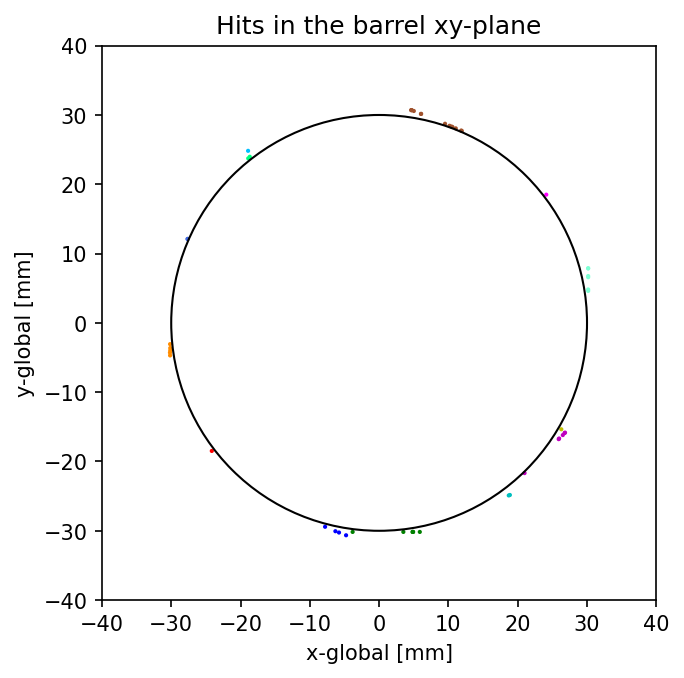

In [26]:
plotHits(sig,pltShow=False,alpha=0.1)
plotHits(sig[abs(sig['p']-sig['p_from_angles'])>10],pltStandalone=False)
plotHits(sig)
plotHits(sig[abs(sig['p']-sig['p_from_angles'])>10])

## New validation of better version of getYlocalAndGamma

In [ ]:
sensorAngles2 = np.arange(-np.pi,np.pi+2*np.pi/8,np.pi/8)
print(sensorAngles2)
#should expand range of sensor angles into the negative
def getYlocalAndGamma(x,y):
    # Get exact angle gamma of the hit position
    gammaP=np.arctan2(y,x)

    # Get two sensor angles that are closest to the exact angle
    diff = np.abs(sensorAngles-gammaP)
    index1 = np.argmin(diff)
    gamma1=sensorAngles[index1]
    diff[index1]=3*np.pi
    index2 = np.argmin(diff)
    gamma2=sensorAngles[index2]

    # Rotate x coordinate of the point by each option for gamma
    x1=x*np.cos(-gamma1)-y*np.sin(-gamma1)
    y1=y*np.cos(-gamma1)+x*np.sin(-gamma1)
    x2=x*np.cos(-gamma2)-y*np.sin(-gamma2)
    y2=y*np.cos(-gamma2)+x*np.sin(-gamma2)

    # Determine which x is closest to expected value
    xTrue=30.16475324197002

    diff1=abs(x1-xTrue)
    diff2=abs(x2-xTrue)
    
    # If both x1 and x2 are really close to the ex
    if diff1 < 0.5 and diff2 < 0.5:
        if y1>8.5 or y1<-4.5:
            index=index2
        else:
            index=index1
            
    elif diff1<diff2:
        index=index1
    else:
        index=index2

    if index==index1:
        yentry=y1
    else:
        yentry=y2
    
    ylocal=-round(yentry/25e-3)*25e-3
    # at some point, add limits to possible ROIs

    if index==0:
        index=16
    if index==17:
        index=1
    
    gamma=sensorAngles[index]

    return ylocal, gamma
def getYlocalAndGamma_tester():
    xList = []
    yList = []
    ylocalList = []
    gammaList = []
    assert len(xList)==len(yList)
    assert len(xList)==len(ylocalList)
    assert len(xList)==len(gammaList)
    for idx,x in enumerate(xList):
        ylocal, gamma = getYlocalAndGamma(xList[idx],yList[idx])
        assert ylocal == ylocalList[idx]
        assert gamma == gammaList[idx]

[-3.14159265 -2.74889357 -2.35619449 -1.96349541 -1.57079633 -1.17809725
 -0.78539816 -0.39269908  0.          0.39269908  0.78539816  1.17809725
  1.57079633  1.96349541  2.35619449  2.74889357  3.14159265  3.53429174]
